## Observations and Insights 

1. Slightly more male then female mice were used in testing
2. Propriva was tested less frequently then the placebo
3.


In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on = 'Mouse ID')
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [75]:
# Checking the number of mice.
combined_data.value_counts('Mouse ID')

Mouse ID
g989    13
l661    10
l471    10
k894    10
k862    10
        ..
u153     1
t573     1
x336     1
f932     1
n482     1
Length: 249, dtype: int64

In [76]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data["combo"] = (combined_data ["Mouse ID"] + combined_data ["Timepoint"].astype(str))
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,combo
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320


In [77]:
# Optional: Get all the data for the duplicate mouse ID. 



In [78]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates(subset = ['combo'])

clean_df = clean_df.drop( columns='combo',axis = 1)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [79]:
# Checking the number of mice in the clean DataFrame.
clean_df.value_counts('Mouse ID')

Mouse ID
z969    10
i177    10
l509    10
l471    10
k894    10
        ..
o848     1
n482     1
d133     1
u153     1
t573     1
Length: 249, dtype: int64

## Summary Statistics

In [80]:
#Drug Regimen, Tumor Volume (mm3)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
groupby_mean = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
groupby_median = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
groupby_variance = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
groupby_std = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
groupby_sem = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
summarygb_df = { 
                "Mean" : groupby_mean,
                "Median" : groupby_median,
                "Variance" : groupby_variance,
                "STD": groupby_std,
                "SEM" : groupby_sem
}


{'Mean': Drug Regimen
 Capomulin    40.675741
 Ceftamin     52.591172
 Infubinol    52.884795
 Ketapril     55.235638
 Naftisol     54.331565
 Placebo      54.033581
 Propriva     52.393463
 Ramicane     40.216745
 Stelasyn     54.233149
 Zoniferol    53.236507
 Name: Tumor Volume (mm3), dtype: float64,
 'Median': Drug Regimen
 Capomulin    41.557809
 Ceftamin     51.776157
 Infubinol    51.820584
 Ketapril     53.698743
 Naftisol     52.509285
 Placebo      52.288934
 Propriva     50.909965
 Ramicane     40.673236
 Stelasyn     52.431737
 Zoniferol    51.818479
 Name: Tumor Volume (mm3), dtype: float64,
 'Variance': Drug Regimen
 Capomulin    24.947764
 Ceftamin     39.290177
 Infubinol    43.128684
 Ketapril     68.553577
 Naftisol     66.173479
 Placebo      61.168083
 Propriva     43.138803
 Ramicane     23.486704
 Stelasyn     59.450562
 Zoniferol    48.533355
 Name: Tumor Volume (mm3), dtype: float64,
 'STD': Drug Regimen
 Capomulin    4.994774
 Ceftamin     6.268188
 Infubinol  

In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sum_mean = clean_df[["Tumor Volume (mm3)"]].mean()
sum_median = clean_df[["Tumor Volume (mm3)"]].median()
sum_variance = clean_df[["Tumor Volume (mm3)"]].var()
sum_std = clean_df[["Tumor Volume (mm3)"]].std()
sum_sem = clean_df[["Tumor Volume (mm3)"]].sem()
summary_df ={
     "Mean" : sum_mean,
    "Median" : sum_median,
    "Variance" : sum_variance,
    "STD" : sum_std,
    "SEM" : sum_sem,
}
# Using the aggregation method, produce the same summary statistics in a single line
sum_agg = clean_df.agg({ "Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem']})
sum_agg

,Tumor Volume (mm3)
mean,50.449276
median,48.951421
var,79.291277
std,8.904565
sem,0.204933


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

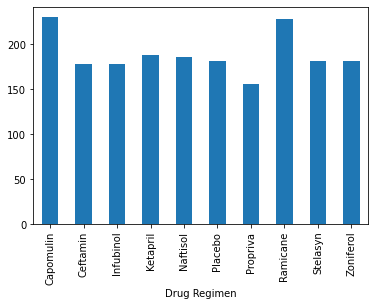

In [82]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
groupby_measue = clean_df.groupby("Drug Regimen")['Timepoint'].count()
groupby_measue.plot.bar('Drug Regimen')


NameError: name 'x' is not defined

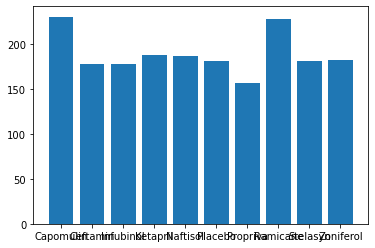

In [116]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_list = ['Capomulin', 'Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

measure = groupby_measue
plt.bar(drug_list, measure)
x_pos = [x for x, in enumerate(x)]

plt.xticks(x_pos,drug_list )
plt.show()

<AxesSubplot:ylabel='Sex'>

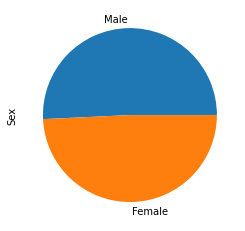

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#groupby_gender = clean_df.groupby("Sex")["Mouse ID"].count()
groupby_gender = clean_df['Sex'].value_counts()
groupby_gender
groupby_gender.plot.pie()

#pie_df = pd.Series(groupby_gender, index = "Male", "Female")
#pie_df.plot.pie()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
